In [188]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [189]:
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(12,7)}
        )

# EDA

In [190]:
customers = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/QXrVDUoQvFhIcg')

In [191]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [192]:
customers.shape

(99441, 5)

In [193]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [194]:
orders = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/0zWmh1bYP6REbw')

In [195]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [196]:
orders.shape

(99441, 8)

In [197]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [198]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [199]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [200]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [201]:
# Сразу переведем столбцы с датой в datetime

orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp)
orders.order_approved_at = pd.to_datetime(orders.order_approved_at)
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date)
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date)
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date)

In [202]:
today = orders['order_purchase_timestamp'].max() + timedelta(days=1)

In [203]:
today

Timestamp('2018-10-18 17:30:18')

In [204]:
# Посмотрим сколько у нас заказов статуса "shipped", которые опаздывают

orders.query('order_status == "shipped"')[orders['order_estimated_delivery_date'] < today].shape[0]

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


1107

In [205]:
# Насколько заказ опаздывает (в днях), если он не был доставлен, и насколько опоздал, если уже доставлен?

orders['is_late'] = np.where(orders['order_status'] == 'delivered', (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days, (today - orders['order_estimated_delivery_date']).dt.days)
orders['is_late'] = np.where(orders['is_late'] > 0, orders['is_late'], 0)

In [206]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
is_late                                 float64
dtype: object

In [208]:
# Примем, что заказ, который имеет статус "shipped" и опаздывает более, чем на 30 дней - не будет доставлен. 
# Посмотрим долю таких заказов, чтобы принять решение, куда определить статус "shipped"

orders.query('order_status == "shipped" & is_late > 30').shape[0] / orders.query('order_status == "shipped"').shape[0]

0.999096657633243

In [209]:
# Аналогично посмотрим на заказы со статусом "approved"

orders.query('order_status == "approved" & is_late > 30').shape[0] / orders.query('order_status == "approved"').shape[0]

1.0

Таких заказов практически 100%, поэтому можем смело считать, что заказы со статусом "approved" и "shipped" не являются покупками (неизвесто, дойдут они или нет)

# Покупкой будем считать оплаченные заказы, которые, вероятнее всего, будут доставлены, то есть остаются только заказы со статусом "delivered" (100% заказов "approved" и 99.99% заказов "shipped" опаздывают более, чем на месяц, и их можно не учитывать).

# Часть 1

In [210]:
num_orders_by_customers = orders \
    .merge(customers, how='left', on='customer_id') \
    .query('order_status == "delivered"') \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_id': 'nunique'}) \
    .rename(columns={'order_id': 'number_of_orders'})

In [211]:
num_orders_by_customers.sort_values('number_of_orders', ascending=False)

,customer_unique_id,number_of_orders
51431,8d50f5eadf50201ccdcedfb9e2ac8455,15
22779,3e43e6105506432c953e165fb2acf44c,9
36706,6469f99c1f9dfae7733b25662e7f1782,7
73921,ca77025e7201e3b30c44b472ff346268,7
10060,1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...,...
31564,565811ed44e539a14bc391cf57373ed1,1
31563,5657f9f721c16800a66c21081d46b18d,1
31562,5657dfebff5868c4dc7e8355fea865c4,1
31561,5657596addb4d7b07b32cd330614bdf8,1


In [212]:
num_orders_by_customers.number_of_orders.unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 15])

In [213]:
num_customers_with_1_order = num_orders_by_customers.query('number_of_orders == 1').shape[0]

In [214]:
num_customers_with_1_order

90557

In [215]:
print(f'Пользователей, которые совершили покупку только один раз - {num_customers_with_1_order}')

Пользователей, которые совершили покупку только один раз - 90557


# Часть 2

In [216]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_late
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0.0


# Будем считать доставленными заказы, у которых либо статус "delivered", либо "shipped", "invoiced", "processing", "created", "approved" с опозданием не более, чем на 30 дней

In [217]:
orders['is_delivered'] = \
      ((orders['order_status'] == 'delivered') \
    | ((orders['order_status'] == "shipped") \
    | (orders['order_status'] == "invoiced") \
    | (orders['order_status'] == "processing") \
    | (orders['order_status'] == "created") \
    | (orders['order_status'] == "approved")) \
    & (orders['is_late'] <= 30)) * 1

In [218]:
orders.query('is_delivered == 0').shape[0]

2962

In [219]:
orders['start_of_month'] = orders['order_purchase_timestamp'].to_numpy().astype('datetime64[M]')

In [220]:
num_of_orders_is_not_delivered = orders \
    .groupby('start_of_month', as_index=False) \
    .agg({'is_delivered': lambda x: x.count() - x.sum()}) \
    .rename(columns={'is_delivered': 'is_not_delivered'})

In [221]:
num_of_orders_is_not_delivered

,start_of_month,is_not_delivered
0,2016-09-01,3
1,2016-10-01,59
2,2016-12-01,0
3,2017-01-01,50
4,2017-02-01,127
5,2017-03-01,136
6,2017-04-01,101
7,2017-05-01,154
8,2017-06-01,110
9,2017-07-01,154


In [222]:
print(f'В среднем в месяц не доставляется {num_of_orders_is_not_delivered["is_not_delivered"].mean()} \
заказов по разным причинам')

В среднем в месяц не доставляется 118.48 заказов по разным причинам


In [223]:
(orders['order_purchase_timestamp'].min(), orders['order_purchase_timestamp'].max(), today)

(Timestamp('2016-09-04 21:15:19'),
 Timestamp('2018-10-17 17:30:18'),
 Timestamp('2018-10-18 17:30:18'))

# Посмотрим детально на причины 

In [224]:
is_not_delivered_orders = orders \
    .query('order_status != "delivered"') \
    .groupby('order_status', as_index=False) \
    .agg({'is_delivered': 'count'}) \
    .rename(columns={'is_delivered': 'is_not_delivered'}) \
    .sort_values('is_not_delivered', ascending=False)

In [225]:
is_not_delivered_orders

,order_status,is_not_delivered
5,shipped,1107
1,canceled,625
6,unavailable,609
3,invoiced,314
4,processing,301
2,created,5
0,approved,2


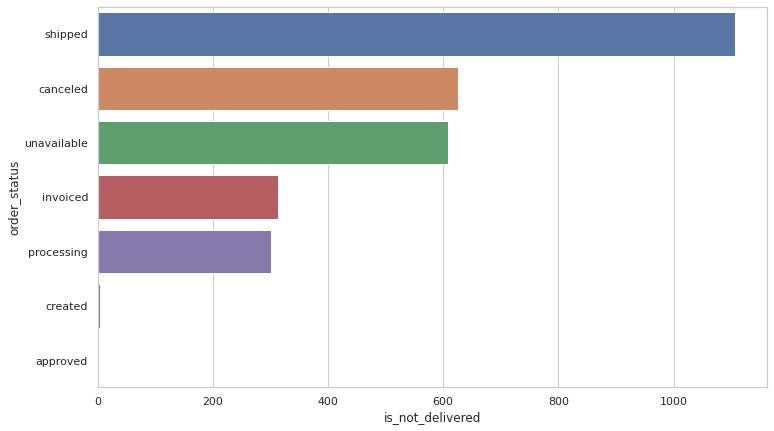

In [226]:
sns.barplot(data=is_not_delivered_orders, x='is_not_delivered', y='order_status')

# Из диаграммы видим, что чуть меньше половины недоставленных заказов приходится на отмененные и недоступные, ну и большая часть - это заказы, которые либо находятся в пути, либо только созданы, либо оплачены, приняты или в обработке. При этом все эти заказы можно считать недоставленными, т.к. они опаздывают более, чем на 30 дней

# Часть 3

In [227]:
items = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg')

In [228]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [229]:
items.shape

(112650, 7)

In [230]:
products_with_orders = orders.merge(items, how='outer', on='order_id')

In [231]:
products_with_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_late,is_delivered,start_of_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0,1,2017-10-01,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0.0,1,2018-07-01,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0,1,2018-08-01,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.0,1,2017-11-01,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0.0,1,2018-02-01,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0.0,1,2018-02-01,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0.0,1,2017-08-01,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0.0,1,2018-01-01,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0.0,1,2018-01-01,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [232]:
# Преобразуем дату создания заказа в день недели

products_with_orders['day_of_week'] = products_with_orders['order_purchase_timestamp'].dt.day_name()

In [233]:
high_sales_day = products_with_orders \
    .query('order_status == "delivered"') \
    .groupby('product_id', as_index=False) \
    .agg({'day_of_week': lambda x: x.mode()})

# Для каждого товара посчитали день (дни), когда его покупали чаще всего

In [234]:
high_sales_day

,product_id,day_of_week
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32211,fff6177642830a9a94a0f2cba5e476d1,"[Saturday, Sunday]"
32212,fff81cc3158d2725c0655ab9ba0f712c,Monday
32213,fff9553ac224cec9d15d49f5a263411f,Friday
32214,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


# Часть 4

# Как и в шаге 1, отберем только покупки

In [235]:
num_orders_by_customers_every_week = orders \
    .merge(customers, how='left', on='customer_id') \
    .query('order_status == "delivered"')

In [236]:
num_orders_by_customers_every_week

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_late,is_delivered,start_of_month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0,1,2017-10-01,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0.0,1,2018-07-01,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0,1,2018-08-01,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.0,1,2017-11-01,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0.0,1,2018-02-01,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,0.0,1,2017-03-01,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0.0,1,2018-02-01,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0.0,1,2017-08-01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0.0,1,2018-01-01,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [237]:
# Считаем сколько недель в месяце

num_orders_by_customers_every_week['weeks_in_month'] = \
    num_orders_by_customers_every_week['order_purchase_timestamp'].dt.days_in_month / 7

In [238]:
num_orders_by_customers_every_week['start_of_month'] = \
    num_orders_by_customers_every_week['order_purchase_timestamp'].to_numpy().astype('datetime64[M]')

In [239]:
# Группируем для подсчета количества заказов каждого пользователя за месяц

weekly_sales = num_orders_by_customers_every_week \
    .groupby(['customer_unique_id', 
              'start_of_month',
              'weeks_in_month'], as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'number_of_orders_per_month'})

In [240]:
weekly_sales

,customer_unique_id,start_of_month,weeks_in_month,number_of_orders_per_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,4.428571,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,4.428571,1
2,0000f46a3911fa3c0805444483337064,2017-03-01,4.428571,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,4.428571,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,4.285714,1
...,...,...,...,...
95189,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,4.285714,1
95190,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,4.428571,1
95191,ffff371b4d645b6ecea244b27531430a,2017-02-01,4.000000,1
95192,ffff5962728ec6157033ef9805bacc48,2018-05-01,4.428571,1


In [241]:
weekly_sales.number_of_orders_per_month.unique()

array([1, 2, 3, 6, 4])

In [242]:
# Получаем среднее количество заказов каждым пользователем в неделю по месяцам

weekly_sales['avg_orders'] = weekly_sales['number_of_orders_per_month'] / weekly_sales['weeks_in_month']

In [243]:
weekly_sales.sort_values('start_of_month')

,customer_unique_id,start_of_month,weeks_in_month,number_of_orders_per_month,avg_orders
48814,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-01,4.285714,1,0.233333
6616,11a40baf46bd96289d1f0936dae9a256,2016-10-01,4.428571,1,0.225806
93477,fb48b86d9a78b53675c121e4ec8981ed,2016-10-01,4.428571,1,0.225806
30338,517a3d8518447c776efd430b66470e27,2016-10-01,4.428571,1,0.225806
23194,3e36312a56bdb312242490706752940b,2016-10-01,4.428571,1,0.225806
...,...,...,...,...,...
51448,8a75bcf1cf3c38af9dff219f4b3044f1,2018-08-01,4.428571,1,0.225806
12609,21b415d826c810b064a7599851f90e2c,2018-08-01,4.428571,1,0.225806
51472,8a898880a61e551c80bacadfb4356255,2018-08-01,4.428571,1,0.225806
67988,b69b36cf39cfb2c756e6c1160853823e,2018-08-01,4.428571,1,0.225806


In [244]:
np.sort(weekly_sales.avg_orders.unique())

array([0.22580645, 0.23333333, 0.25      , 0.4516129 , 0.46666667,
       0.5       , 0.67741935, 0.7       , 0.75      , 0.90322581,
       0.93333333, 1.        , 1.35483871])

# Часть 5 
# Когортный анализ пользователей по оценке retention

In [245]:
# Табличка с заказами и выручкой от каждого из них

orders_with_revenue = products_with_orders \
    .groupby('order_id', as_index=False) \
    .agg({'price': 'sum'}) \
    .rename(columns={'price': 'revenue'}) 

In [246]:
total_table = customers.merge(orders, how='left', on='customer_id').merge(orders_with_revenue, how='left', on='order_id').query('order_status == "delivered"')
total_table

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_late,is_delivered,start_of_month,revenue
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,0.0,1,2017-05-01,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,0.0,1,2018-01-01,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,1,2018-05-01,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,0.0,1,2018-03-01,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,0.0,1,2018-07-01,230.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,0.0,1,2018-04-01,74.90
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,0.0,1,2018-04-01,114.90
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,7.0,1,2018-04-01,37.00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,0.0,1,2017-11-01,689.00


In [247]:
users = total_table

In [248]:
users.shape

(96478, 16)

In [249]:
# Для каждого пользователя считаю дату регистрации

reg_dates = users \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_purchase_timestamp': 'min'}) \
    .rename(columns={'order_purchase_timestamp': 'reg_date'})
reg_dates

,customer_unique_id,reg_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
93354,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
93355,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
93356,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [250]:
# Вношу эту дату регистрации в табличку users

users = users.merge(reg_dates, how='left', on='customer_unique_id')

In [251]:
users = users.rename(columns={'start_of_month': 'transaction_month'})

In [252]:
# Т.к. для когортного анализа меня интересует месяц регистрации, а не дата целиком, преобразую reg_date в reg_month

users['reg_month'] = users['reg_date'].to_numpy().astype('datetime64[M]')

In [253]:
users = users[['customer_unique_id', 'reg_month', 'transaction_month']]

In [254]:
users.head()

,customer_unique_id,reg_month,transaction_month
0,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2017-05-01
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-01,2018-01-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-01,2018-05-01
3,259dac757896d24d7702b9acbbff3f3c,2018-03-01,2018-03-01
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-01,2018-07-01


In [255]:
users.transaction_month.unique()

array(['2017-05-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-03-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2017-09-01T00:00:00.000000000',
       '2018-02-01T00:00:00.000000000', '2017-11-01T00:00:00.000000000',
       '2018-04-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-06-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-10-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-06-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2017-07-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2016-10-01T00:00:00.000000000', '2016-09-01T00:00:00.000000000',
       '2016-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [256]:
# Далее мне понадобится cross-join для того, чтобы каждому пользователю сопостовлять каждый месяц с начала его регистрации, 
# и считать его активность помесячно

min_date = users.reg_month.min()
max_date = users.reg_month.max()

In [257]:
# Для этого предварительно создадим отдельную табличку со всеми месяцами

months = pd.DataFrame(pd.date_range(min_date, max_date, freq='MS'))

In [258]:
months.columns = ['month']

In [259]:
months['month'] = pd.to_datetime(months['month'])
months

,month
0,2016-09-01
1,2016-10-01
2,2016-11-01
3,2016-12-01
4,2017-01-01
5,2017-02-01
6,2017-03-01
7,2017-04-01
8,2017-05-01
9,2017-06-01


In [260]:
months.dtypes

month    datetime64[ns]
dtype: object

In [261]:
months.shape

(24, 1)

In [262]:
# Cross-join по колонке, состоящей из одинакового символа

users['key'] = 0
months['key'] = 0

In [263]:
table = users.merge(months, how='outer', on='key')

In [264]:
table.dtypes

customer_unique_id            object
reg_month             datetime64[ns]
transaction_month     datetime64[ns]
key                            int64
month                 datetime64[ns]
dtype: object

In [265]:
table['month'] = pd.to_datetime(table['month'])

In [266]:
# Теперь отдельно создадим табличку с транзакциями по каждому пользователю помесячно, 
# чтобы в дальнейшем всё это соединить в одну табличку

transactions = total_table.groupby(['customer_unique_id', 'start_of_month'], as_index=False).agg({'revenue': 'sum'})

In [267]:
transactions = transactions.rename(columns={'start_of_month': 'transaction_month'})

In [268]:
transactions

,customer_unique_id,transaction_month,revenue
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-01,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,180.00
...,...,...,...
95189,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,1570.00
95190,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,64.89
95191,ffff371b4d645b6ecea244b27531430a,2017-02-01,89.90
95192,ffff5962728ec6157033ef9805bacc48,2018-05-01,115.00


In [269]:
# Наконец, создаем финальную табличку по каждому пользователю, в которой каждому пользователю соответсвуют каждый месяц

table = table.merge(transactions, how='left', \
            left_on=['customer_unique_id', 'month'], \
            right_on=['customer_unique_id', 'transaction_month']) \
    .drop(columns=['key', 'transaction_month_x', 'transaction_month_y'])

In [270]:
# Нас не интересуют месяцы, которые были раньше месяца регистрации пользователя, поэтому просто удалим эти строки

table = table[table['month'] >= table['reg_month']]

In [271]:
# Для подсчета retention'a создадим кононку 'action', которая будет равна 1, если пользователь был активен в этом месяце,
# и 0 в ином случае

table['action'] = (table['revenue'] > 0) * 1

In [272]:
table

,customer_unique_id,reg_month,month,revenue,action
8,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2017-05-01,124.99,1
9,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2017-06-01,NaN,0
10,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2017-07-01,NaN,0
11,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2017-08-01,NaN,0
12,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2017-09-01,NaN,0
...,...,...,...,...,...
2315467,84732c5050c01db9b23e19ba39899398,2017-12-01,2018-04-01,NaN,0
2315468,84732c5050c01db9b23e19ba39899398,2017-12-01,2018-05-01,NaN,0
2315469,84732c5050c01db9b23e19ba39899398,2017-12-01,2018-06-01,NaN,0
2315470,84732c5050c01db9b23e19ba39899398,2017-12-01,2018-07-01,NaN,0


In [273]:
# Для проверки посчитаю сколько у меня получилось уникальных пользователей, которые совершили покупку

table.query('action == 1').groupby('customer_unique_id', as_index=False).agg({'action': 'sum'}).shape[0]

93358

In [274]:
# И для исходной таблички

total_table.groupby('customer_unique_id', as_index=False).agg({'order_id': 'nunique'}).shape[0]

93358

In [275]:
# Для построения когортной таблицы мне понадобится колонка "life-time", то есть просто число месяцев после регистрации

table['life_time'] = (table.month.dt.to_period('M') - table.reg_month.dt.to_period('M')).apply(lambda x: x.n)

In [276]:
table

,customer_unique_id,reg_month,month,revenue,action,life_time
8,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2017-05-01,124.99,1,0
9,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2017-06-01,NaN,0,1
10,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2017-07-01,NaN,0,2
11,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2017-08-01,NaN,0,3
12,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2017-09-01,NaN,0,4
...,...,...,...,...,...,...
2315467,84732c5050c01db9b23e19ba39899398,2017-12-01,2018-04-01,NaN,0,4
2315468,84732c5050c01db9b23e19ba39899398,2017-12-01,2018-05-01,NaN,0,5
2315469,84732c5050c01db9b23e19ba39899398,2017-12-01,2018-06-01,NaN,0,6
2315470,84732c5050c01db9b23e19ba39899398,2017-12-01,2018-07-01,NaN,0,7


In [277]:
# И теперь можем построить эту самую когортную табличку retention'a 

retention = table.pivot_table(index='reg_month', columns='life_time', values='action', aggfunc='mean')

In [278]:
retention

life_time,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
reg_month,,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
2016-10-01,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.007273,0.000000,0.000000,0.007273,...,0.000000,0.007273,0.000000,0.007273,0.0,0.014545,0.018182,0.0,0.0,NaN
2016-12-01,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN
2017-01-01,1.0,0.006386,0.005109,0.002554,0.010217,0.002554,0.007663,0.003831,0.003831,0.000000,...,0.003831,0.002554,0.005109,0.007663,0.0,0.002554,NaN,NaN,NaN,NaN
2017-02-01,1.0,0.003527,0.005879,0.002939,0.008230,0.002352,0.005291,0.004115,0.002352,0.004115,...,0.002352,0.001176,0.001176,0.004115,0.0,NaN,NaN,NaN,NaN,NaN
2017-03-01,1.0,0.009834,0.007943,0.010212,0.007943,0.003404,0.003404,0.006430,0.007186,0.001513,...,0.004160,0.005673,0.001513,0.002648,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,1.0,0.012252,0.004647,0.003802,0.005492,0.005070,0.007605,0.005915,0.005915,0.003380,...,0.001690,0.001690,0.002957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,1.0,0.010638,0.009820,0.008183,0.007092,0.008729,0.009002,0.003001,0.005728,0.008183,...,0.003546,0.004092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.013949,0.012399,0.013019,0.010229,0.011779,0.007440,0.004960,0.002480,0.004030,...,0.009299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [279]:
# Сделаем ее более удобочитаемой

ur_style = (retention
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

life_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
reg_month,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:00:00,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2016-10-01 00:00:00,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.73%,0.00%,0.00%,0.73%,0.00%,1.09%,0.00%,0.73%,0.00%,0.73%,0.00%,0.73%,0.00%,1.45%,1.82%,0.00%,0.00%,
2016-12-01 00:00:00,100.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,,,
2017-01-01 00:00:00,100.00%,0.64%,0.51%,0.26%,1.02%,0.26%,0.77%,0.38%,0.38%,0.00%,1.02%,0.26%,1.40%,0.77%,0.38%,0.26%,0.51%,0.77%,0.00%,0.26%,,,,
2017-02-01 00:00:00,100.00%,0.35%,0.59%,0.29%,0.82%,0.24%,0.53%,0.41%,0.24%,0.41%,0.29%,0.65%,0.24%,0.41%,0.24%,0.12%,0.12%,0.41%,0.00%,,,,,
2017-03-01 00:00:00,100.00%,0.98%,0.79%,1.02%,0.79%,0.34%,0.34%,0.64%,0.72%,0.15%,0.79%,0.38%,0.53%,0.23%,0.42%,0.57%,0.15%,0.26%,,,,,,
2017-04-01 00:00:00,100.00%,1.23%,0.46%,0.38%,0.55%,0.51%,0.76%,0.59%,0.59%,0.34%,0.51%,0.17%,0.08%,0.08%,0.17%,0.17%,0.30%,,,,,,,
2017-05-01 00:00:00,100.00%,1.06%,0.98%,0.82%,0.71%,0.87%,0.90%,0.30%,0.57%,0.82%,0.55%,0.85%,0.57%,0.11%,0.35%,0.41%,,,,,,,,
2017-06-01 00:00:00,100.00%,1.39%,1.24%,1.30%,1.02%,1.18%,0.74%,0.50%,0.25%,0.40%,0.62%,1.18%,0.34%,0.77%,0.93%,,,,,,,,,


# Когорта с самым высоким retention на 3-й месяц - это когорта 2017-06, у которой этот показатель равняется 1.3%

In [348]:
print(f'Опоздавших заказов {total_table[total_table["is_late"] > 0].shape[0] / total_table.shape[0] * 100:.2f}%')

Опоздавших заказов 6.77%


# Из когортного анализа можем сделать вывод, что пользователи имеют очень низкий retention, то есть имеет место быть очень сильный отток, на вопрос почему я затрудняюсь ответить ввиду недостаточного количества данных, т.к. мое предположение о некачественной доставке, скорее всего, неверно (всего около 7% заказов, доставленных позже срока)

# Часть 6
# RFM-segmentation

In [300]:
rfm_table = total_table.groupby('customer_unique_id', as_index=False).agg({'order_purchase_timestamp': 'max',
                                                               'order_id': 'nunique',
                                                               'revenue': 'sum'}) \
    .rename(columns={'order_purchase_timestamp': 'recency',
                     'order_id': 'frequency',
                     'revenue': 'monetary'})

In [301]:
rfm_table

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,180.00
...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,1,1570.00
93354,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1,64.89
93355,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,1,89.90
93356,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,1,115.00


In [302]:
rfm_table['recency'] = (today - rfm_table['recency']).dt.days

# Для создания R-кластера я воспользуюсь разбивкой на квантили с помощью функции pd.qcut() с параметром labels=False для получания не диапазонов, а целых значений. Далее, инвертирую значения, чтобы R и recency находились в обратной пропорции: чем выше recency, тем ниже R-score.

In [303]:
rfm_table['r'] = (4 - pd.qcut(rfm_table['recency'], q=4, labels=False))

In [304]:
rfm_table

,customer_unique_id,recency,frequency,monetary,r
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90,4
2,0000f46a3911fa3c0805444483337064,586,1,69.00,1
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,2
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,2
...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,496,1,1570.00,1
93354,fffea47cd6d3cc0a88bd621562a9d061,311,1,64.89,2
93355,ffff371b4d645b6ecea244b27531430a,618,1,89.90,1
93356,ffff5962728ec6157033ef9805bacc48,169,1,115.00,3


In [305]:
rfm_table.groupby('r', as_index=False).agg({'recency': ['mean', 'count']})

r     recency       
            mean  count
0  1  500.583248  23328
1  2  326.364055  23230
2  3  216.235797  23164
3  4  107.279700  23636

In [306]:
# rfm_table['f'] = (4 - pd.qcut(rfm_table['frequency'], q=4, labels=False, duplicates='drop'))

In [307]:
# rfm_table.groupby('f', as_index=False).agg({'frequency': ['mean', 'count']})

In [308]:
rfm_table.frequency.value_counts()

1     90557
2      2573
3       181
4        28
5         9
6         5
7         3
15        1
9         1
Name: frequency, dtype: int64

# Понимаем, что с помощью квантилей не получится корректно разбить наш столбец frequency на бакеты, т.к. в нем слишком много "1" и "2". Сделаем F-кластер вручную с помощью функции f(x), предварительно посмотрев на данные частот

In [309]:
def f(x):
    if x == 1:
        return 1
    if x in [2, 3]:
        return 2
    if x in [4, 5, 6]:
        return 3
    return 4

In [310]:
rfm_table['f'] = rfm_table['frequency'].apply(f)

In [311]:
rfm_table

,customer_unique_id,recency,frequency,monetary,r,f
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90,4,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90,4,1
2,0000f46a3911fa3c0805444483337064,586,1,69.00,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,2,1
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,2,1
...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,496,1,1570.00,1,1
93354,fffea47cd6d3cc0a88bd621562a9d061,311,1,64.89,2,1
93355,ffff371b4d645b6ecea244b27531430a,618,1,89.90,1,1
93356,ffff5962728ec6157033ef9805bacc48,169,1,115.00,3,1


In [312]:
rfm_table.groupby('f', as_index=False).agg({'frequency': ['mean', 'count']})

f frequency       
          mean  count
0  1  1.000000  90557
1  2  2.065723   2754
2  3  4.452381     42
3  4  9.000000      5

# M-кластер попробуем создать через квантили

In [313]:
rfm_table['m'] = pd.qcut(rfm_table['monetary'], q=4, labels=False) + 1

In [314]:
rfm_table

,customer_unique_id,recency,frequency,monetary,r,f,m
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90,4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,586,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,2,1,4
...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,496,1,1570.00,1,1,4
93354,fffea47cd6d3cc0a88bd621562a9d061,311,1,64.89,2,1,2
93355,ffff371b4d645b6ecea244b27531430a,618,1,89.90,1,1,3
93356,ffff5962728ec6157033ef9805bacc48,169,1,115.00,3,1,3


In [315]:
rfm_table.groupby('m', as_index=False).agg({'monetary': ['mean', 'count']})

m    monetary       
            mean  count
0  1   29.101072  23341
1  2   65.430433  23338
2  3  117.735007  23339
3  4  354.216677  23340

In [316]:
rfm_table['monetary'].min(), rfm_table['monetary'].max()

(0.85, 13440.0)

# С помощью квантилей кластеризация явно некорректная, поэтому создам его вручную для более правильного разбиения

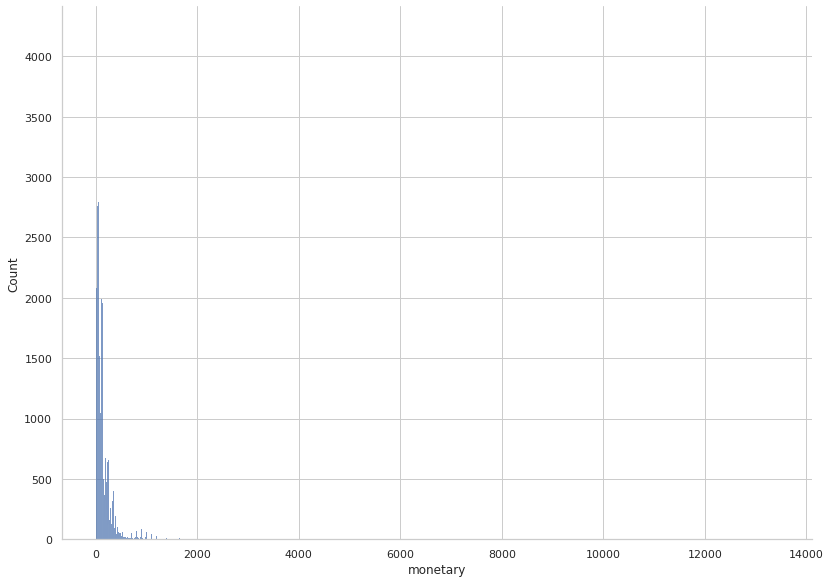

In [317]:
sns.displot(rfm_table.monetary, height=8.27, aspect=11.7/8.27)

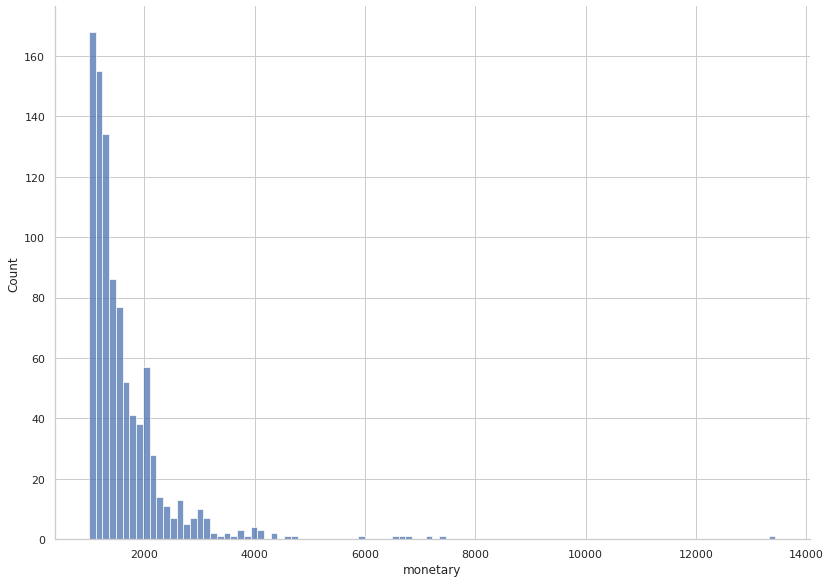

In [318]:
# Посмотрим в масштабе подробнее правую часть распределения

sns.displot(rfm_table.query('monetary > 1000').monetary, height=8.27, aspect=11.7/8.27)

In [319]:
def m(x):
    if 0 <= x < 400:
        return 1
    if 400 <= x < 1200:
        return 2
    if 1200 <= x < 4000:
        return 3
    return 4

In [320]:
rfm_table['m'] = rfm_table['monetary'].apply(m)

In [321]:
rfm_table.groupby('m', as_index=False).agg({'monetary': ['mean', 'count']})

m     monetary       
             mean  count
0  1   104.984655  88498
1  2   647.948101   4203
2  3  1746.556485    643
3  4  6014.604286     14

In [322]:
rfm_table['rfm_score'] = rfm_table['r'] + rfm_table['f'] + rfm_table['m']

In [323]:
rfm_table['rfm_segment'] = (rfm_table['r']).astype(str) + (rfm_table['f']).astype(str) + (rfm_table['m']).astype(str)

In [324]:
rfm_table

,customer_unique_id,recency,frequency,monetary,r,f,m,rfm_score,rfm_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90,4,1,1,6,411
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90,4,1,1,6,411
2,0000f46a3911fa3c0805444483337064,586,1,69.00,1,1,1,3,111
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,2,1,1,4,211
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,2,1,1,4,211
...,...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,496,1,1570.00,1,1,3,5,113
93354,fffea47cd6d3cc0a88bd621562a9d061,311,1,64.89,2,1,1,4,211
93355,ffff371b4d645b6ecea244b27531430a,618,1,89.90,1,1,1,3,111
93356,ffff5962728ec6157033ef9805bacc48,169,1,115.00,3,1,1,5,311


In [325]:
rfm_table \
    .groupby('rfm_score', as_index=False) \
    .agg({'customer_unique_id': 'nunique'}) \
    .rename(columns={'customer_unique_id': 'number_of_customers'}) \
    .sort_values('number_of_customers', ascending=False) \
    .head(10)

,rfm_score,number_of_customers
3,6,23528
2,5,23056
1,4,22963
0,3,21609
4,7,1865
5,8,299
6,9,31
7,10,6
8,11,1


# Как видно из таблички выше, большая часть пользователей имеет очень низкий RFM-score. Посмотрим чуть подробнее

In [326]:
# Посмотрим какие кластеры включают в себя наибольшее количество пользователей

size_of_segments = rfm_table \
    .groupby('rfm_segment', as_index=False) \
    .agg({'customer_unique_id': 'nunique'}) \
    .rename(columns={'customer_unique_id': 'number_of_customers'}) \
    .sort_values('number_of_customers', ascending=False)
size_of_segments.head(10)

,rfm_segment,number_of_customers
28,411,21688
0,111,21609
9,211,21506
18,311,21319
29,412,975
19,312,972
1,112,956
10,212,915
32,421,652
22,321,640


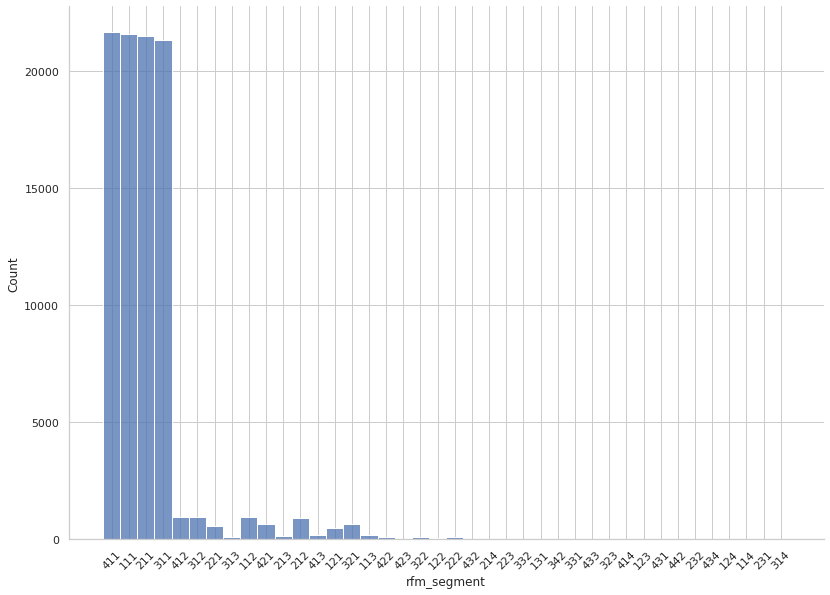

In [327]:
# Посмотрим как распределены сегменты

ax = sns.displot(rfm_table.rfm_segment, height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=45)

In [329]:
rfm = total_table.groupby('customer_unique_id', as_index=False).agg({'order_purchase_timestamp': 'max',
                                                               'order_id': 'nunique',
                                                               'revenue': 'sum'}) \
    .rename(columns={'order_purchase_timestamp': 'recency',
                     'order_id': 'frequency',
                     'revenue': 'monetary'})

In [330]:
rfm['recency'] = (today - rfm['recency']).dt.days

In [331]:
rfm['recency'] = pd.qcut(rfm['recency'], q=4)

In [332]:
r = rfm['recency'].drop_duplicates().sort_values(ascending=False).reset_index(drop=True)

In [333]:
f = pd.Series(data=([0, 1], [2, 3], [4, 5, 6], [7, 17]))

In [334]:
m = pd.Series(data=([0, 399.9], [400, 1199.9], [1200, 3999.9], [4000, 13440]))

In [335]:
rfm = pd.DataFrame(data={'score': range(1, 5), 'recency': r, 'frequency': f, 'monetary': m})

In [336]:
rfm_segments = rfm_table[['rfm_segment', 'r', 'f', 'm']].merge(rfm[['score', 'recency']], how='left', left_on='r', right_on='score')
rfm_segments = rfm_segments.merge(rfm[['score', 'frequency']], how='left', left_on='f', right_on='score')
rfm_segments = rfm_segments.merge(rfm[['score', 'monetary']], how='left', left_on='m', right_on='score')

In [337]:
rfm_segments = rfm_segments[['rfm_segment', 'recency', 'frequency', 'monetary']] \
    .drop_duplicates('rfm_segment').reset_index(drop=True)

In [338]:
rfm_segments['recency'] = rfm_segments['recency'].astype(str) + ' дней'
rfm_segments['frequency'] = rfm_segments['frequency'].astype(str) + ' заказов'
rfm_segments['monetary'] = rfm_segments['monetary'].astype(str) + ' рублей'

In [339]:
rfm_segments.merge(size_of_segments, how='inner', on='rfm_segment')

,rfm_segment,recency,frequency,monetary,number_of_customers
0,411,"(49.999, 164.0] дней","[0, 1] заказов","[0, 399.9] рублей",21688
1,111,"(395.0, 763.0] дней","[0, 1] заказов","[0, 399.9] рублей",21609
2,211,"(268.0, 395.0] дней","[0, 1] заказов","[0, 399.9] рублей",21506
3,311,"(164.0, 268.0] дней","[0, 1] заказов","[0, 399.9] рублей",21319
4,412,"(49.999, 164.0] дней","[0, 1] заказов","[400, 1199.9] рублей",975
5,312,"(164.0, 268.0] дней","[0, 1] заказов","[400, 1199.9] рублей",972
6,221,"(268.0, 395.0] дней","[2, 3] заказов","[0, 399.9] рублей",568
7,313,"(164.0, 268.0] дней","[0, 1] заказов","[1200, 3999.9] рублей",119
8,112,"(395.0, 763.0] дней","[0, 1] заказов","[400, 1199.9] рублей",956
9,421,"(49.999, 164.0] дней","[2, 3] заказов","[0, 399.9] рублей",652


Выше табличка имеет все сегменты, которые удалось получить из наших данных. Столбцы R, F, M заполнены диапазонами значений соответсвующего сегмента и количество клиентов в каждом из сегментов

# Из распределения сегментов можно сделать вывод о том, практически все пользователи находятся в кластерах 411, 111, 211, 311. То есть это люди, которые сделали в разное время всего 1 заказ на небольшую сумму (до 400 рублей). Это еще раз подтверждает вывод, который я сделал в результате когортного анализа о высоком оттоке по разным причинам. Низкий чек заказов не подзволяет говорить о том, что такой низкий retention- это просто специфика данного бизнеса (как например сервис по бронированию авиабилетов, в котором пользователи достаточно редко совершают какие-то сделки), поэтому дал бы совет бизнесу либо пересмотреть качество продукции, либо отделу маркетинга, к примеру, с помощью промо-акции попытаться увеличить retention